In [225]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import statsmodels.formula.api as smf

from library import regulations
from library import analysis
from library import tables

In [226]:
subjects = ['m_3rd_avescore', 'r_3rd_avescore',
            'm_4th_avescore', 'r_4th_avescore',
            'm_5th_avescore', 'r_5th_avescore'
            'm_6th_avescore', 'r_6th_avescore',
            'm_7th_avescore', 'r_7th_avescore',
            'm_8th_avescore', 'r_8th_avescore', 
            'alg_avescore', 'eng1_avescore']
years = ['yr1112', 'yr1213', 'yr1314', 'yr1415', 'yr1516', 'yr1617', 'yr1718']
titles = ['3rd Grade Math', '3rd Grade Reading', 
          '4th Grade Math', '4th Grade Reading',
         '5th Grade Math', '5th Grade Reading', 
         '6th Grade Math', '6th Grade Reading',
         '7th Grade Math', '7th Grade Reading',
         '8th Grade Math', '8th Grade Reading',
         'Algebra', 'English I']
passing_cutoff = []

In [227]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
years = {'yr1112': 2011, 'yr1213': 2012,
             'yr1314': 2013, 'yr1415': 2014,
             'yr1516': 2015, 'yr1617': 2016, 'yr1718': 2017}
data['year_num'] = data['year'].map(years)

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,416) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Performance

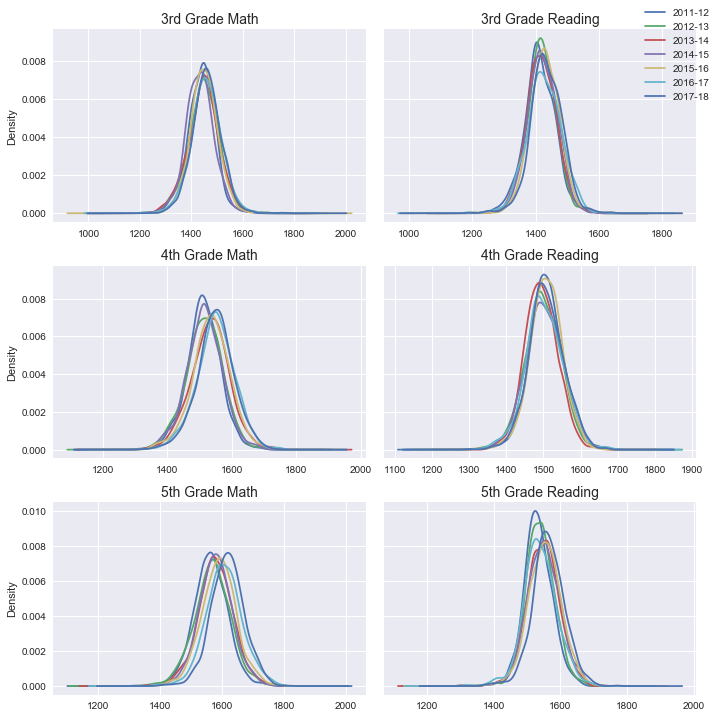

In [154]:
subjects = ['m_3rd_avescore', 'r_3rd_avescore',
            'm_4th_avescore', 'r_4th_avescore',
            'm_5th_avescore', 'r_5th_avescore']
titles = ['3rd Grade Math', '3rd Grade Reading', 
          '4th Grade Math', '4th Grade Reading',
         '5th Grade Math', '5th Grade Reading']
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharey='row', figsize = (10, 10))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for sub, title, ax_num in zip(subjects,titles,axes):
    for yr in years:
        data[sub][data.year == yr].plot(kind='density', ax = ax_num) 
    ax_num.set_title(title, fontsize = 14)


f.legend(['2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18'])

plt.tight_layout()


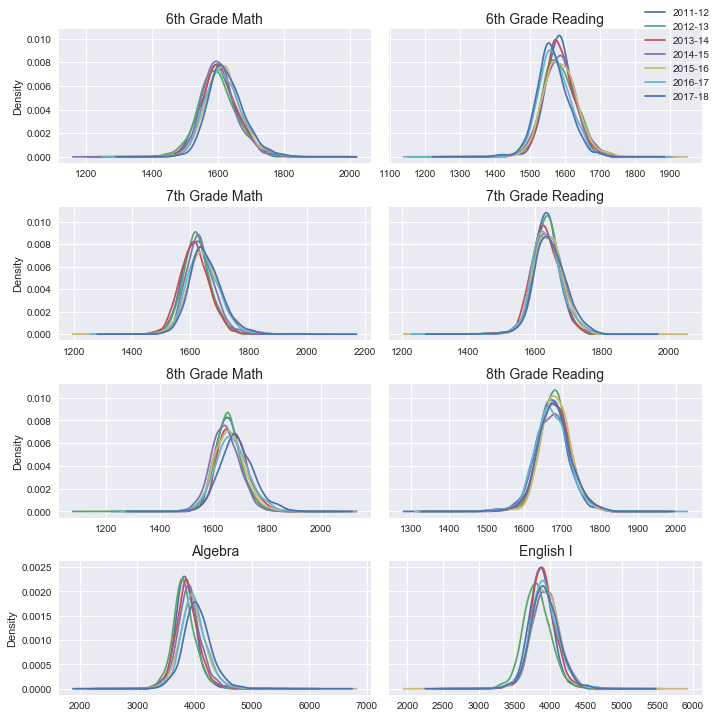

In [155]:
subjects = ['m_6th_avescore', 'r_6th_avescore',
            'm_7th_avescore', 'r_7th_avescore',
            'm_8th_avescore', 'r_8th_avescore',
           'alg_avescore', 'eng1_avescore']
titles = ['6th Grade Math', '6th Grade Reading', 
          '7th Grade Math', '7th Grade Reading',
         '8th Grade Math', '8th Grade Reading',
         'Algebra', 'English I']
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharey='row', figsize = (10, 10))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for sub, title, ax_num in zip(subjects,titles,axes):
    for yr in years:
        data[sub][data.year == yr].plot(kind='density', ax = ax_num) 
    ax_num.set_title(title, fontsize = 14)


f.legend(['2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18'])
plt.tight_layout()

In [172]:
passing_cutoff = pd.read_csv(os.path.join(table_path, 'passing_cutoff.csv'),
                  sep=",")
passing_cutoff

,Year,3rd Math,3rd Reading,4th Math,4th Reading,5th Math,5th Reading,6th Math,6th Reading,7th Math,7th Reading,8th Math,8th Reading,Algebra,English I,English II
0,2011-12,1380,1315,1461,1410,1474,1445,1494,1497,1545,1549,1573,1562,3467,3711,3693
1,2012-13,1376,1316,1459,1416,1481,1449,1499,1497,1543,1543,1575,1563,3457,3699,3708
2,2013-14,1378,1321,1464,1408,1482,1452,1497,1490,1546,1544,1572,1562,3450,3713,3703
3,2014-15,1333,1319,1438,1409,1482,1443,1517,1489,1552,1548,1570,1567,3454,3734,3721
4,2015-16,1347,1337,1453,1422,1487,1458,1523,1504,1563,1556,1595,1575,3478,3750,3750
5,2016-17,1360,1327,1456,1421,1488,1460,1517,1506,1566,1552,1583,1580,3464,3775,3775
6,2017-18,1351,1331,1446,1424,1488,1462,1528,1506,1575,1558,1589,1580,3500,3775,3775


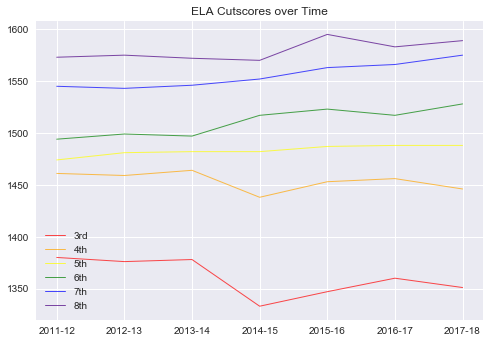

In [191]:
plt.plot(passing_cutoff.Year,passing_cutoff['3rd Math'], marker='', color='red', linewidth=1, alpha=0.7, label = '3rd')
plt.plot(passing_cutoff.Year,passing_cutoff['4th Math'], marker='', color='orange', linewidth=1, alpha=0.7, label = '4th')
plt.plot(passing_cutoff.Year,passing_cutoff['5th Math'], marker='', color='yellow', linewidth=1, alpha=0.7, label = '5th')
plt.plot(passing_cutoff.Year,passing_cutoff['6th Math'], marker='', color='green', linewidth=1, alpha=0.7, label = '6th')
plt.plot(passing_cutoff.Year,passing_cutoff['7th Math'], marker='', color='blue', linewidth=1, alpha=0.7, label = '7th')
plt.plot(passing_cutoff.Year,passing_cutoff['8th Math'], marker='', color='indigo', linewidth=1, alpha=0.7, label = '8th')
plt.title("ELA Cutscores over Time")
plt.legend()

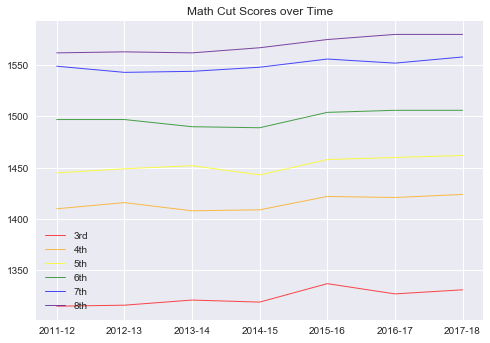

In [208]:
plt.plot(passing_cutoff.Year,passing_cutoff['3rd Reading'], marker='', color='red', linewidth=1, alpha=0.7, label = '3rd')
plt.plot(passing_cutoff.Year,passing_cutoff['4th Reading'], marker='', color='orange', linewidth=1, alpha=0.7, label = '4th')
plt.plot(passing_cutoff.Year,passing_cutoff['5th Reading'], marker='', color='yellow', linewidth=1, alpha=0.7, label = '5th')
plt.plot(passing_cutoff.Year,passing_cutoff['6th Reading'], marker='', color='green', linewidth=1, alpha=0.7, label = '6th')
plt.plot(passing_cutoff.Year,passing_cutoff['7th Reading'], marker='', color='blue', linewidth=1, alpha=0.7, label = '7th')
plt.plot(passing_cutoff.Year,passing_cutoff['8th Reading'], marker='', color='indigo', linewidth=1, alpha=0.7, label = '8th')
plt.title("Math Cut Scores over Time")
plt.legend()

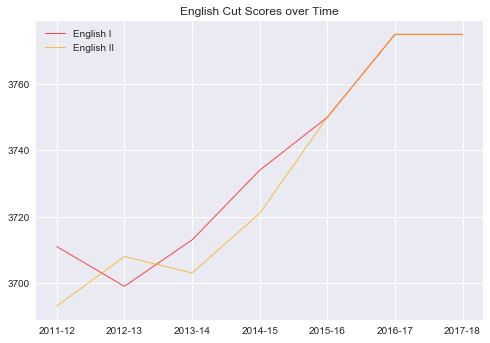

In [212]:
plt.plot(passing_cutoff.Year,passing_cutoff['English I'], marker='', color='red', linewidth=1, alpha=0.7, label = 'English I')
plt.plot(passing_cutoff.Year,passing_cutoff['English II'], marker='', color='orange', linewidth=1, alpha=0.7, label = 'English II')

plt.title("English Cut Scores over Time")
plt.legend()

In [195]:
data.groupby(['year'])['m_3rd_avescore'].min()

year
yr1112    1228.0
yr1213    1227.0
yr1314    1216.0
yr1415    1204.0
yr1516    1194.0
yr1617    1212.0
yr1718    1247.0
Name: m_3rd_avescore, dtype: float64

In [213]:
staar_3rd_math = data.groupby(['year'])['m_3rd_avescore'].agg({'mean_score': 'mean', 'std_score':'std', 'min': 'min', 'max':'max'})
staar_3rd_reading = data.groupby(['year'])['r_3rd_avescore'].agg({'mean_score': 'mean', 'std_score':'std', 'min': 'min', 'max':'max'})
staar_algebra = data.groupby(['year'])['alg_avescore'].agg({'mean_score': 'mean', 'std_score':'std', 'min': 'min', 'max':'max'})
staar_english = data.groupby(['year'])['eng1_avescore'].agg({'mean_score': 'mean', 'std_score':'std', 'min': 'min', 'max':'max'})

staar_algebra
#staar_english
staar_3rd_math

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,mean_score,std_score,min,max
year,,,,
yr1112,1439.644737,52.400909,1228.0,1649.0
yr1213,1448.281250,60.827674,1227.0,1693.0
yr1314,1446.092561,60.790614,1216.0,1654.0
yr1415,1432.899741,53.981850,1204.0,1631.0
yr1516,1448.924414,54.220375,1194.0,1746.0
yr1617,1457.628049,58.643041,1212.0,1669.0
yr1718,1459.330716,55.374861,1247.0,1750.0


In [233]:
formula = 'alg_avescore' + '~ year_num'
results = smf.ols(formula, data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           alg_avescore   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     833.4
Date:                Mon, 19 Nov 2018   Prob (F-statistic):          4.05e-174
Time:                        11:32:22   Log-Likelihood:                -52660.
No. Observations:                7724   AIC:                         1.053e+05
Df Residuals:                    7722   BIC:                         1.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.939e+04   2539.457    -27.324      0.000   -7.44e+04   -6.44e+04
year_num      36.4004      1.261     28.869      0.000      33.929      38.872
==============================================================================
Omnibus:                      670.091   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1786.826
Skew:                           0.493   Prob(JB):                         0.00
Kurtosis:                       5.140   Cond. No.                     2.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [230]:
formula = 'r_3rd_avescore' + '~ year'
results = smf.ols(formula, data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         m_3rd_avescore   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     31.13
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           3.46e-37
Time:                        11:31:10   Log-Likelihood:                -43923.
No. Observations:                8050   AIC:                         8.786e+04
Df Residuals:                    8043   BIC:                         8.791e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1439.6447      1.679    857.248      0.000    1436.353    1442.937
year[T.yr1213]     8.6365      2.369      3.646      0.000       3.993      13.280
year[T.yr1314]     6.4478      2.367      2.724      0.006       1.808      11.087
year[T.yr1415]    -6.7450      2.366     -2.850      0.004     -11.383      -2.107
year[T.yr1516]     9.2797      2.369      3.917      0.000       4.635      13.924
year[T.yr1617]    17.9833      2.371      7.585      0.000      13.336      22.631
year[T.yr1718]    19.6860      2.372      8.300      0.000      15.036      24.335
==============================================================================
Omnibus:                      128.159   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.487
Skew:                          -0.030   Prob(JB):                     6.68e-55
Kurtosis:                       3.860   Cond. No.                         7.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""